In [2]:
import pandas as pd
import os
import opendatasets as od
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [3]:
ds = "https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales"
od.download(ds)


Skipping, found downloaded files in ".\rossmann-store-sales" (use force=True to force download)


In [4]:
ross_df = pd.read_csv("rossmann-store-sales/train.csv",low_memory=False)

In [5]:
store_df = pd.read_csv("rossmann-store-sales/store.csv")

In [6]:
test_df = pd.read_csv("rossmann-store-sales/test.csv")
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [7]:
store_df.shape[0] + test_df.shape[0]

42203

In [8]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [11]:
merged_df = ross_df.merge(store_df, how='left', on='Store')

In [12]:
merged_test_df = test_df.merge(store_df, how='left', on="Store")

In [13]:
merged_test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [14]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [16]:
round(merged_df.describe().T, 1)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.4,321.9,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.0,2.0,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.8,3849.9,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.1,464.4,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.1,7715.3,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.2,3.2,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.7,6.0,1900.0,2006.0,2010.0,2013.0,2015.0


In [17]:
merged_df[merged_df.Sales == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
291,292,5,2015-07-31,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
875,876,5,2015-07-31,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
1406,292,4,2015-07-30,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
1990,876,4,2015-07-30,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
2521,292,3,2015-07-29,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [19]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [20]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [21]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

In [22]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

<Axes: xlabel='Sales', ylabel='Count'>

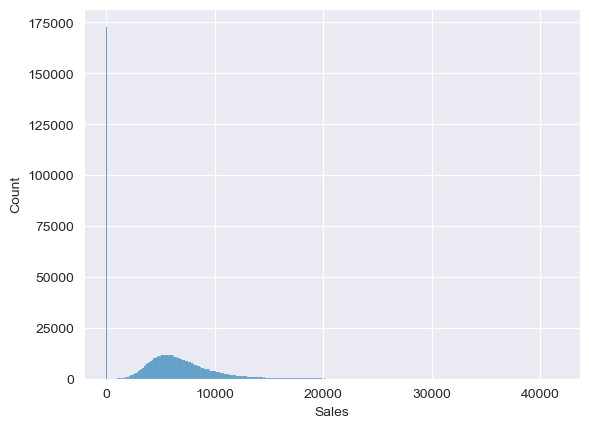

In [23]:
sns.histplot(merged_df, x='Sales')

<Axes: xlabel='Open', ylabel='Count'>

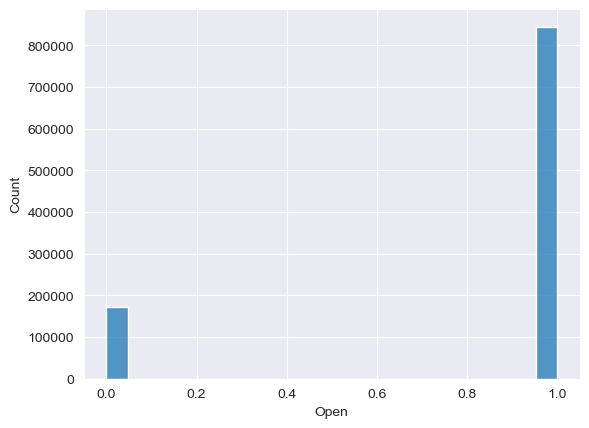

In [24]:
sns.histplot(merged_df, x='Open')

In [25]:
merged_df = merged_df[merged_df.Open ==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

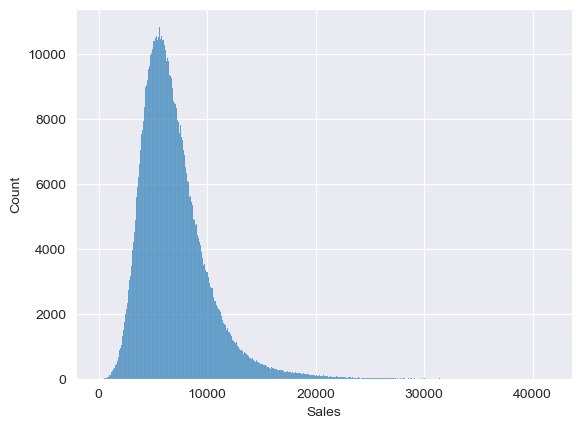

In [26]:
sns.histplot(merged_df, x='Sales')

<Axes: xlabel='Date', ylabel='Sales'>

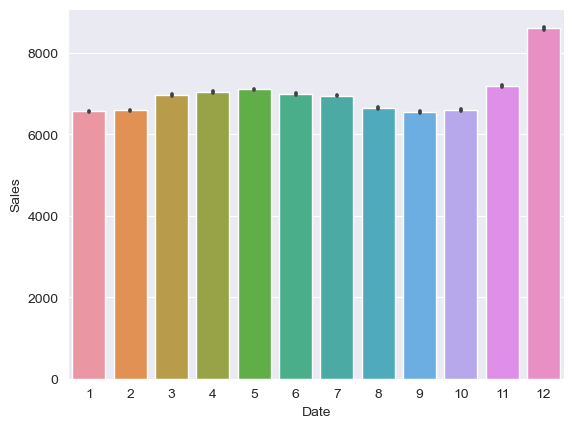

In [27]:
sns.barplot(merged_df, x=merged_df.Date.dt.month, y='Sales')

<Figure size 1800x800 with 0 Axes>

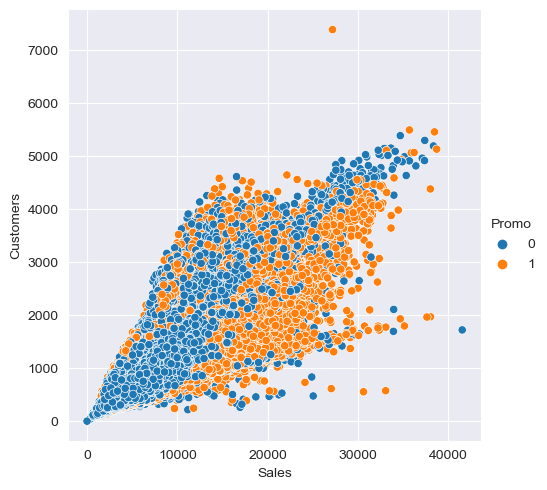

In [28]:
plt.figure(figsize=(18, 8))
sns.relplot(merged_df, x='Sales', y='Customers', hue='Promo')

In [29]:
merged_df[merged_df.Customers == merged_df.Customers.max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
993496,817,2,2013-01-22,27190,7388,1,1,0,0,a,a,140.0,3.0,2006.0,0,NaN,NaN,NaN


<Axes: xlabel='Promo', ylabel='Sales'>

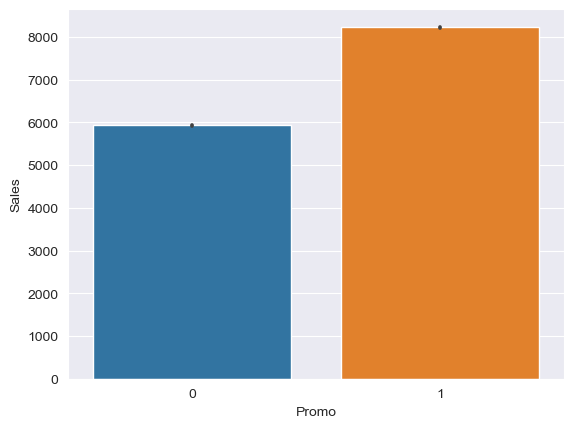

In [30]:
sns.barplot(merged_df, x='Promo', y='Sales')

In [31]:
merged_df.corr()

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_30116\4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.000346,0.007710,0.033977,NaN,-0.000012,0.000512,-0.027049,-0.051089,-0.005028,0.007736,0.010681,0.037971
DayOfWeek,0.000346,1.000000,-0.178736,-0.097266,NaN,-0.289265,-0.139315,0.005535,0.000379,0.001273,-0.003241,-0.000599,0.003387
Sales,0.007710,-0.178736,1.000000,0.823597,NaN,0.368145,0.038617,-0.036396,-0.043489,0.016101,-0.127596,0.095311,-0.034713
Customers,0.033977,-0.097266,0.823597,1.000000,NaN,0.182846,0.024902,-0.148506,-0.044965,0.010175,-0.202232,0.061682,0.040893
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,-0.000012,-0.289265,0.368145,0.182846,NaN,1.000000,0.028964,-0.002393,-0.000131,-0.000173,-0.000324,-0.001209,-0.002183
SchoolHoliday,0.000512,-0.139315,0.038617,0.024902,NaN,0.028964,1.000000,-0.004280,-0.000445,0.000575,-0.008245,-0.003943,-0.003448
CompetitionDistance,-0.027049,0.005535,-0.036396,-0.148506,NaN,-0.002393,-0.004280,1.000000,-0.059938,0.027965,-0.141975,-0.053462,-0.111032
CompetitionOpenSinceMonth,-0.051089,0.000379,-0.043489,-0.044965,NaN,-0.000131,-0.000445,-0.059938,1.000000,-0.060725,-0.010578,-0.036149,0.049500
CompetitionOpenSinceYear,-0.005028,0.001273,0.016101,0.010175,NaN,-0.000173,0.000575,0.027965,-0.060725,1.000000,-0.077221,-0.080114,0.012592


In [32]:
merged_df.corr()["Sales"].sort_values(ascending=False)

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_30116\2606793630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()["Sales"].sort_values(ascending=False)


Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

### Feature Engineering

In [33]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month 
merged_df['Year'] = merged_df.Date.dt.year

In [34]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month 
merged_test_df['Year'] = merged_test_df.Date.dt.year

In [35]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [36]:
merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
Day                             31
Month                           12
Year                             3
dtype: int64

In [37]:
len(merged_df)

844392

In [38]:
merged_df.sample(frac=0.75, random_state=None)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
386155,219,4,2014-07-24,2785,376,1,0,0,1,a,...,1640.0,2.0,2013.0,0,NaN,NaN,NaN,24,7,2014
191908,129,1,2015-02-09,5654,757,1,0,0,0,a,...,2460.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9,2,2015
399777,848,4,2014-07-10,5605,701,1,0,0,0,a,...,370.0,7.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10,7,2014
233225,191,6,2015-01-03,5829,565,1,0,0,0,a,...,1100.0,8.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",3,1,2015
139885,511,6,2015-03-28,5372,805,1,0,0,1,a,...,2060.0,9.0,2009.0,0,NaN,NaN,NaN,28,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934821,122,5,2013-03-15,5360,685,1,0,0,0,a,...,58260.0,4.0,2013.0,0,NaN,NaN,NaN,15,3,2013
608380,376,4,2014-01-02,6996,907,1,0,0,1,a,...,160.0,8.0,2012.0,0,NaN,NaN,NaN,2,1,2014
650089,830,2,2013-11-26,6307,540,1,0,0,0,a,...,6320.0,NaN,NaN,1,5.0,2011.0,"Jan,Apr,Jul,Oct",26,11,2013
804608,364,3,2013-07-10,4224,607,1,0,0,1,a,...,13620.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,7,2013


In [39]:
frac_size = int(.75 * len(merged_df))
frac_size

633294

In [40]:
sorted_df = merged_df.sort_values("Date", ascending=True).copy()

In [41]:
train_df, val_df = sorted_df[:frac_size].copy(), sorted_df[frac_size:].copy()

In [42]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [43]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [44]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday',
       'StoreType', 'Assortment',  'Day', 'Month', 'Year']
input_cols

['Store',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'StoreType',
 'Assortment',
 'Day',
 'Month',
 'Year']

In [45]:
target_cols = "Sales"

In [46]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [47]:
merged_df["Store"].value_counts()

562    942
769    942
733    942
423    942
85     942
      ... 
909    607
100    606
744    605
348    597
644    592
Name: Store, Length: 1115, dtype: int64

In [48]:
train_inputs  = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()

In [49]:
test_inputs = merged_df[input_cols].copy()

In [50]:
train_target = train_df[target_cols].copy()
val_target = val_df[target_cols].copy()

In [51]:
numerical_cols = ["Day", "Month", "Year", "Store"]
categorical_cols = ["DayOfWeek", "Promo", "StateHoliday", "StoreType", "Assortment"]

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
train_inputs[numerical_cols].isna().sum()

Day      0
Month    0
Year     0
Store    0
dtype: int64

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numerical_cols])

In [55]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [56]:
scaler = MinMaxScaler().fit(train_inputs[numerical_cols])

In [57]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [60]:
enc.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [61]:
encoded_cols = enc.get_feature_names_out().tolist()
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'Promo_0',
 'Promo_1',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [62]:
train_inputs[encoded_cols] = enc.transform(train_inputs[categorical_cols])

In [63]:
val_inputs[encoded_cols] = enc.transform(val_inputs[categorical_cols])

In [64]:
test_inputs[encoded_cols] = enc.transform(test_inputs[categorical_cols])

In [65]:
X_train, X_val, X_test = train_inputs[numerical_cols+encoded_cols], val_inputs[numerical_cols+encoded_cols], test_inputs[numerical_cols+encoded_cols]

### Fixed / Random Guess
#### Baseline models

In [67]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [68]:
train_t_preds = return_mean(X_train)

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
mean_squared_error(train_t_preds, train_target, squared=False)

3082.450443277419

In [71]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    lo, hi = 3000, 18000
    return np.random.random(len(inputs)) * (hi-lo)+lo

In [72]:
mean_squared_error(train_target, guess_random(X_train), squared=False)

6436.119993583608

#### Exercise: Write a function that implements the following strategy
1. If the store is closed, return 0
2. If the store is open, return the average sales of the store for the current month in the previous year.

In [81]:
def process_store(input):
    store_count = 1
    len_store = input.Store.nunique()
    len_unique = input.Store.unique().tolist()
    count = 1
    arr = []
    for i in len_unique:
        avg = 

SyntaxError: invalid syntax (2941101336.py, line 1)

In [138]:
d = train_df.groupby(["Year", "Month", "Store"])
d.all()

DayOfWeek  Date  Sales  Customers  Open  Promo  \
Year Month Store                                                   
2013 1     1           True  True   True       True  True  False   
           2           True  True   True       True  True  False   
           3           True  True   True       True  True  False   
           4           True  True   True       True  True  False   
           5           True  True   True       True  True  False   
...                     ...   ...    ...        ...   ...    ...   
2014 12    1111        True  True   True       True  True  False   
           1112        True  True   True       True  True  False   
           1113        True  True   True       True  True  False   
           1114        True  True   True       True  True  False   
           1115        True  True   True       True  True  False   

                  StateHoliday  SchoolHoliday  StoreType  Assortment  \
Year Month Store                                                       
2013 1     1              True          False       True        True   
           2              True          False       True        True   
           3              True          False       True        True   
           4              True          False       True        True   
           5              True          False       True        True   
...                        ...            ...        ...         ...   
2014 12    1111           True          False       True        True   
           1112           True          False       True        True   
           1113           True          False       True        True   
           1114           True          False       True        True   
           1115           True          False       True        True   

                  CompetitionDistance  CompetitionOpenSinceMonth  \
Year Month Store                                                   
2013 1     1                     True                       True   
           2                     True                       True   
           3                     True                       True   
           4                     True                       True   
           5                     True                       True   
...                               ...                        ...   
2014 12    1111                  True                       True   
           1112                  True                       True   
           1113                  True                       True   
           1114                  True                       True   
           1115                  True                       True   

                  CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Year Month Store                                                      
2013 1     1                          True   False             True   
           2                          True    True             True   
           3                          True    True             True   
           4                          True   False             True   
           5                          True   False             True   
...                                    ...     ...              ...   
2014 12    1111                       True    True             True   
           1112                       True   False             True   
           1113                       True   False             True   
           1114                       True   False             True   
           1115                       True    True             True   

                  Promo2SinceYear  PromoInterval   Day  
Year Month Store                                        
2013 1     1                 True           True  True  
           2                 True           True  True  
           3                 True           True  True  
           4                 True           True  True  
           5                 True           T

In [99]:
d = train_df[(train_df.Store == 1)& (train_df.Month==1) & (train_df.Year == 2014)]
d.Sales.mean()

4569.7692307692305

In [132]:
len(train_df)

633294

In [ ]:
d

In [147]:
def try_model(model):
    model.fit(X_train, train_target)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    
    train_rmse = mean_squared_error(train_target, train_preds, squared=False)
    val_rmse = mean_squared_error(val_target, val_preds, squared=False)    
    
    return train_rmse, val_rmse

In [143]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [148]:
try_model(LinearRegression())

(2741.593387542823, 2818.030115148269)

In [149]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [150]:
try_model(Lasso())

(2741.714390470815, 2817.9472931012024)

In [151]:
try_model(ElasticNet())

(2879.043210389495, 2972.665886040382)

In [152]:
try_model(SGDRegressor())

(2742.4686256247865, 2831.0193946205873)

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [154]:
try_model(DecisionTreeRegressor())

(0.0, 1555.515026301181)

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
try_model(RandomForestRegressor())

(477.00173006804124, 1379.561730639252)